In [1]:
%cd ../

/home/zulqarnain/Code/ntfa_rewrite_batching_fixed/htfatorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.tardb as tardb
import htfa_torch.utils as utils

In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
affvids_db = tardb.FmriTarDataset('data/avfp_mc_zrest_norest.tar')

In [6]:
dtfa = DTFA.DeepTFA(affvids_db, num_factors=100, embedding_dim=2)

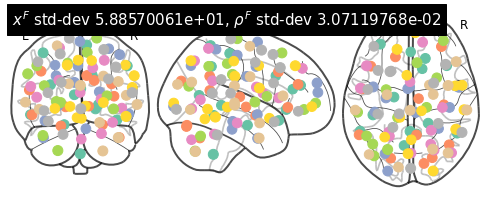

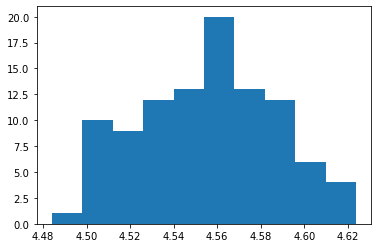

(<nilearn.plotting.displays.OrthoProjector at 0x7ff48f5a4070>,
 tensor([[-3.9001e+01, -3.1837e+01,  5.5465e+01],
         [-1.6784e+01, -1.3121e+01, -2.0038e+01],
         [ 1.9119e+01, -4.0585e+01,  8.7353e-01],
         [ 1.2849e+01,  1.6660e+01,  3.1868e+01],
         [-6.2228e+00, -6.4065e+01,  1.1340e+01],
         [ 7.5615e-01,  3.4432e+01,  1.7793e+01],
         [ 6.7885e+00, -5.2010e+01,  6.3662e+01],
         [ 9.0840e-02, -4.9121e+01, -5.0721e+01],
         [-5.2459e+01, -4.8708e+01, -9.5489e+00],
         [-3.1242e+01,  4.2630e+01,  2.1889e+01],
         [ 3.8633e+01,  1.9869e+01, -1.5059e+01],
         [ 1.6110e+01,  2.7564e+01, -3.4959e+00],
         [ 4.9586e+01, -5.1078e+01,  4.1711e+01],
         [-5.0660e+01, -4.4882e+00, -9.7173e+00],
         [-2.0286e+01, -7.7364e+01, -2.1465e+01],
         [ 2.3422e+01, -7.6859e+01, -2.0167e+01],
         [ 1.4715e+01, -8.2905e+01,  2.6407e+01],
         [ 3.3050e+01,  4.0044e+01,  2.2856e+01],
         [-5.3462e+01, -5.2741e+01,  

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
dtfa.num_blocks

1834

In [9]:
dtfa.num_voxels

215206

In [10]:
losses = dtfa.train(num_steps=200, learning_rate={'q': 1e-2, 'p': 1e-4}, log_level=logging.INFO, num_particles=1,
                    batch_size=80, use_cuda=True, checkpoint_steps=100, patience=500,
                    blocks_filter=affvids_db.inference_filter(training=True))

09/20/2021 14:23:36 [Epoch 1] (793215ms) ELBO -6.27535784e+11 = log-likelihood -6.27470324e+11 - KL from prior 6.54593128e+07
09/20/2021 14:23:36 Saving checkpoint...
09/20/2021 14:34:57 [Epoch 2] (680978ms) ELBO -5.98907609e+11 = log-likelihood -5.98870808e+11 - KL from prior 3.68005885e+07
09/20/2021 14:46:45 [Epoch 3] (708336ms) ELBO -5.88220621e+11 = log-likelihood -5.88193363e+11 - KL from prior 2.72568563e+07
09/20/2021 14:58:06 [Epoch 4] (681430ms) ELBO -5.82689995e+11 = log-likelihood -5.82669161e+11 - KL from prior 2.08332799e+07
09/20/2021 15:09:50 [Epoch 5] (703729ms) ELBO -5.76308396e+11 = log-likelihood -5.76292834e+11 - KL from prior 1.55609982e+07
09/20/2021 15:21:33 [Epoch 6] (703119ms) ELBO -5.66868375e+11 = log-likelihood -5.66856659e+11 - KL from prior 1.17163553e+07
09/20/2021 15:33:03 [Epoch 7] (690176ms) ELBO -5.55674399e+11 = log-likelihood -5.55665354e+11 - KL from prior 9.04484808e+06
09/20/2021 15:44:35 [Epoch 8] (691312ms) ELBO -5.43744940e+11 = log-likelihoo

09/21/2021 03:05:09 [Epoch 66] (703460ms) ELBO -4.47506798e+11 = log-likelihood -4.47494055e+11 - KL from prior 1.27443007e+07
09/21/2021 03:17:16 [Epoch 67] (726447ms) ELBO -4.47450408e+11 = log-likelihood -4.47437616e+11 - KL from prior 1.27923288e+07
09/21/2021 03:28:53 [Epoch 68] (697668ms) ELBO -4.47281161e+11 = log-likelihood -4.47268325e+11 - KL from prior 1.28363919e+07
09/21/2021 03:40:26 [Epoch 69] (693158ms) ELBO -4.47227358e+11 = log-likelihood -4.47214479e+11 - KL from prior 1.28788789e+07
09/21/2021 03:52:20 [Epoch 70] (713609ms) ELBO -4.46993061e+11 = log-likelihood -4.46980138e+11 - KL from prior 1.29234888e+07
09/21/2021 04:04:11 [Epoch 71] (711125ms) ELBO -4.46940660e+11 = log-likelihood -4.46927690e+11 - KL from prior 1.29703812e+07
09/21/2021 04:15:52 [Epoch 72] (700485ms) ELBO -4.46784510e+11 = log-likelihood -4.46771496e+11 - KL from prior 1.30148316e+07
09/21/2021 04:27:39 [Epoch 73] (707510ms) ELBO -4.46712566e+11 = log-likelihood -4.46699515e+11 - KL from prior

09/21/2021 15:38:11 [Epoch 130] (695648ms) ELBO -4.42594969e+11 = log-likelihood -4.42580094e+11 - KL from prior 1.48742540e+07
09/21/2021 15:49:48 [Epoch 131] (697106ms) ELBO -4.42610545e+11 = log-likelihood -4.42595654e+11 - KL from prior 1.48917446e+07
09/21/2021 16:01:22 [Epoch 132] (694076ms) ELBO -4.42485914e+11 = log-likelihood -4.42470992e+11 - KL from prior 1.49219768e+07
09/21/2021 16:13:07 [Epoch 133] (704938ms) ELBO -4.42529594e+11 = log-likelihood -4.42514652e+11 - KL from prior 1.49420729e+07
09/21/2021 16:24:38 [Epoch 134] (690968ms) ELBO -4.42407975e+11 = log-likelihood -4.42393010e+11 - KL from prior 1.49639683e+07
09/21/2021 16:36:28 [Epoch 135] (710083ms) ELBO -4.42451949e+11 = log-likelihood -4.42436959e+11 - KL from prior 1.49906399e+07
09/21/2021 16:47:51 [Epoch 136] (683592ms) ELBO -4.42325414e+11 = log-likelihood -4.42310400e+11 - KL from prior 1.50152654e+07
09/21/2021 17:11:26 [Epoch 138] (706581ms) ELBO -4.42246491e+11 = log-likelihood -4.42231435e+11 - KL fr

09/22/2021 04:46:50 [Epoch 197] (701390ms) ELBO -4.40492707e+11 = log-likelihood -4.40476528e+11 - KL from prior 1.61788142e+07
09/22/2021 04:58:48 [Epoch 198] (718009ms) ELBO -4.40572506e+11 = log-likelihood -4.40556312e+11 - KL from prior 1.61936317e+07
09/22/2021 05:10:48 [Epoch 199] (719880ms) ELBO -4.40480556e+11 = log-likelihood -4.40464347e+11 - KL from prior 1.62095390e+07
09/22/2021 05:22:52 [Epoch 200] (724258ms) ELBO -4.40488232e+11 = log-likelihood -4.40472003e+11 - KL from prior 1.62282730e+07
09/22/2021 05:22:52 Saving checkpoint...


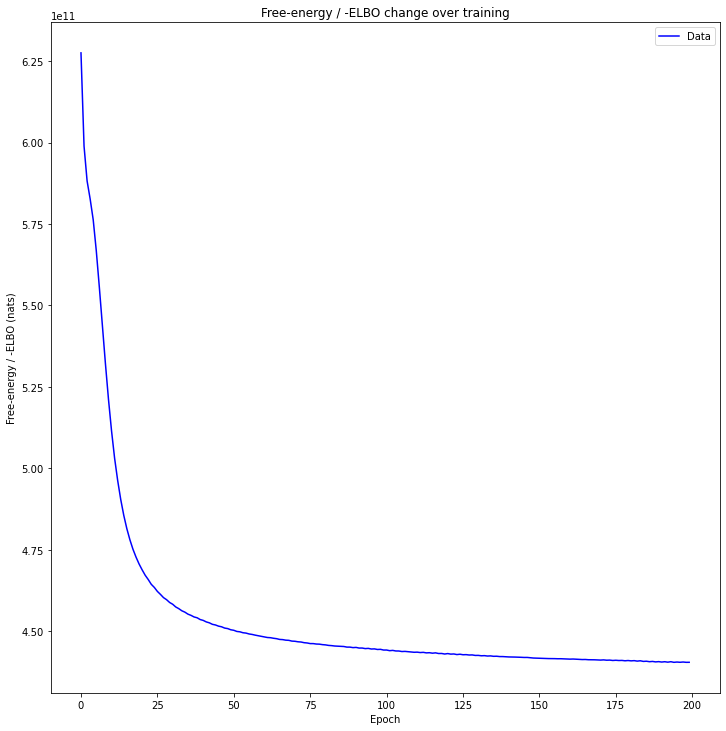

In [11]:
utils.plot_losses(losses)

In [36]:
len(dtfa.subjects())

51

In [32]:
def task_labeler(task):
    if 'Heights' in task:
        return 'Heights'
    elif 'Social' in task:
        return 'Social threat'
    elif 'Spider' in task:
        return 'Spiders'
    elif 'rest' in task:
        return 'Rest'
    else:
        return None

def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

/home/zulqarnain/Code/ntfa_rewrite_batching_fixed/htfatorch/htfa_torch/utils.py:153: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


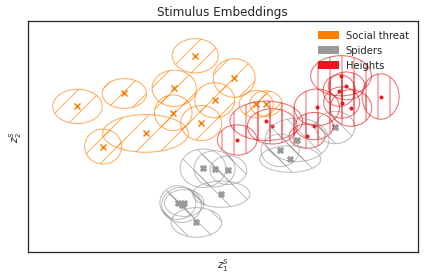

In [34]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Set1',
                            filename='avfp_norest_task_embedding.pdf')

In [14]:
def subject_labeler(subject):
    return 'Subject %d' % subject

/home/zulqarnain/Code/ntfa_rewrite_batching_fixed/htfatorch/htfa_torch/utils.py:149: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()
/home/zulqarnain/Code/ntfa_rewrite_batching_fixed/htfatorch/htfa_torch/utils.py:153: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


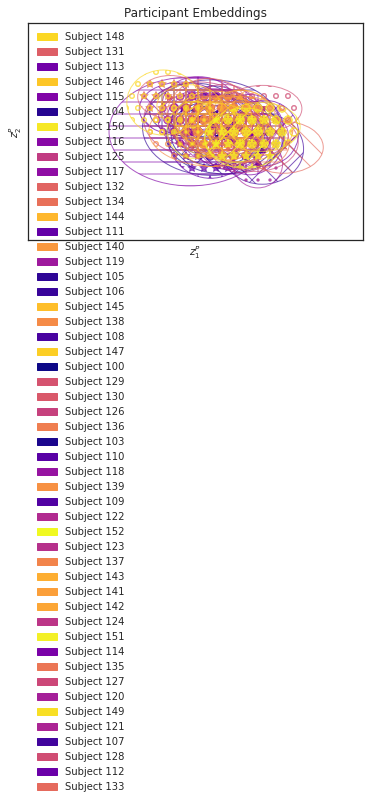

In [15]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None, colormap='plasma')

In [16]:
def block_task_labeler(b):
    task = b['task']
    if 'heights' in task:
        return 'Heights'
    elif 'social' in task:
        return 'Social threat'
    elif 'spider' in task:
        return 'Spiders'
    elif 'rest' in task:
        return 'Rest'
    else:
        return None

09/22/2021 05:22:54 Plotting factors for Participant 140, run 5


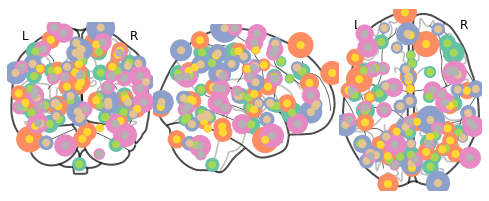

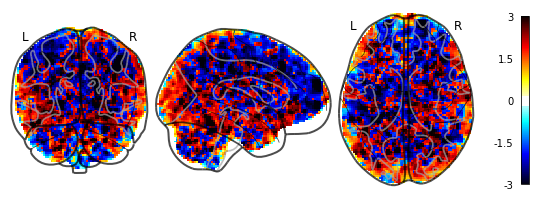

09/22/2021 05:23:04 Reconstruction Error (Frobenius Norm): 5.10765961e+02 out of 4.69633942e+02


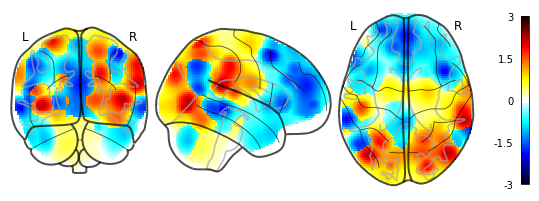

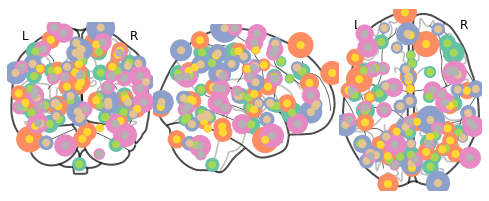

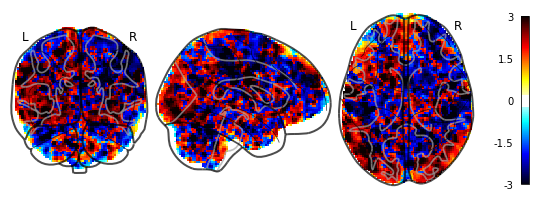

09/22/2021 05:23:16 Reconstruction Error (Frobenius Norm): 5.38954041e+02 out of 5.06186493e+02


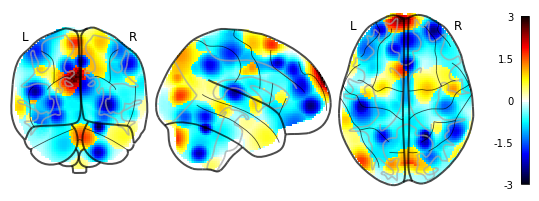

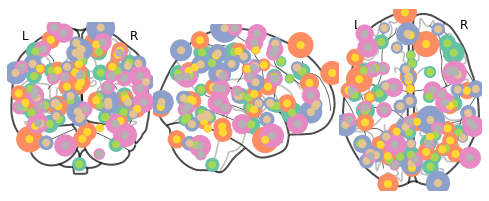

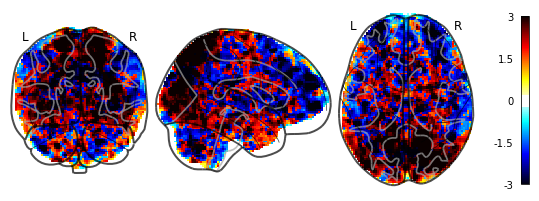

09/22/2021 05:23:29 Reconstruction Error (Frobenius Norm): 6.01748108e+02 out of 5.34304199e+02


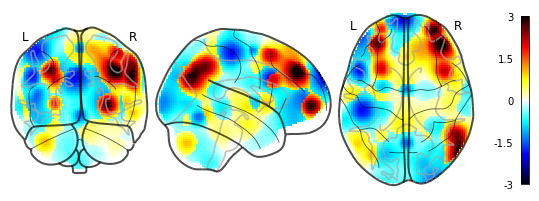

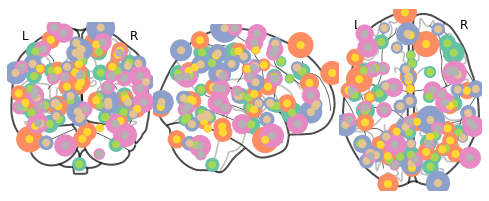

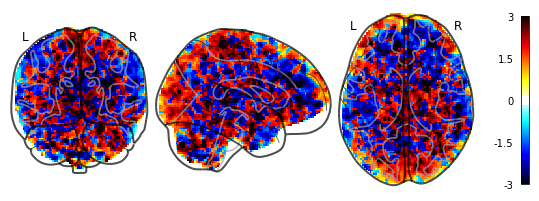

09/22/2021 05:23:43 Reconstruction Error (Frobenius Norm): 4.77072449e+02 out of 4.39763031e+02


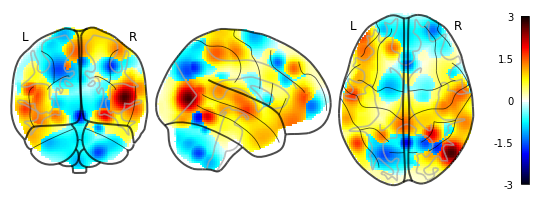

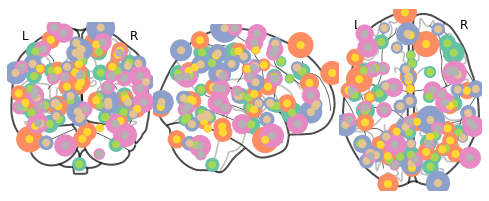

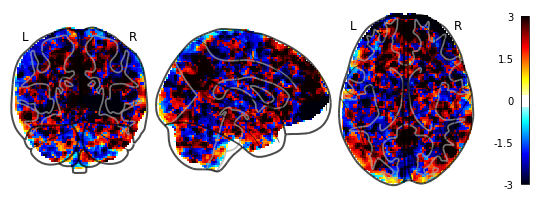

09/22/2021 05:23:58 Reconstruction Error (Frobenius Norm): 5.97010559e+02 out of 5.46480652e+02


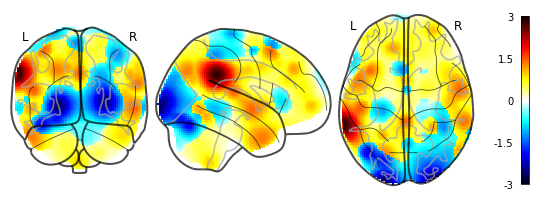

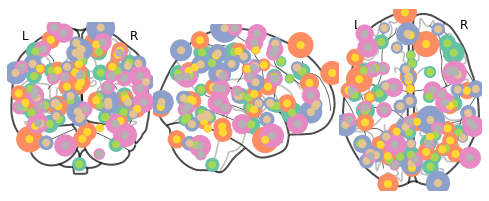

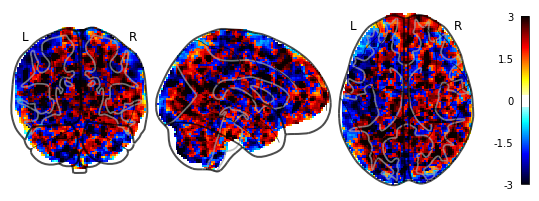

09/22/2021 05:24:15 Reconstruction Error (Frobenius Norm): 5.31791077e+02 out of 5.00353302e+02


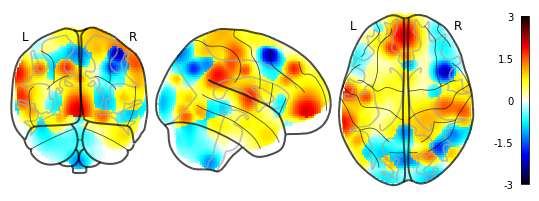

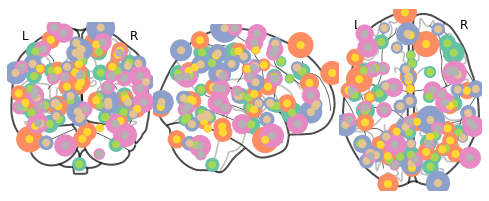

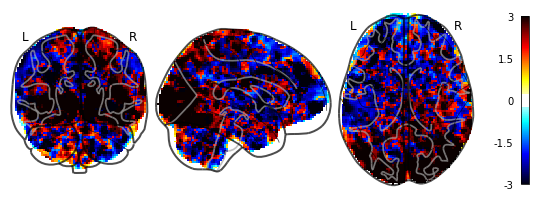

09/22/2021 05:24:32 Reconstruction Error (Frobenius Norm): 6.18546692e+02 out of 5.86982361e+02


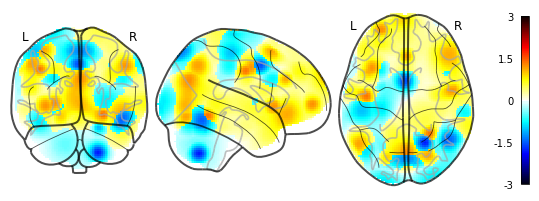

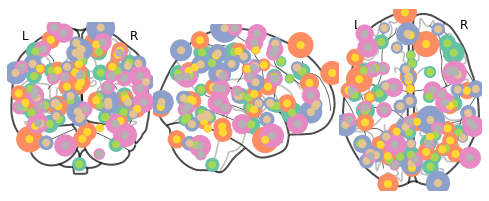

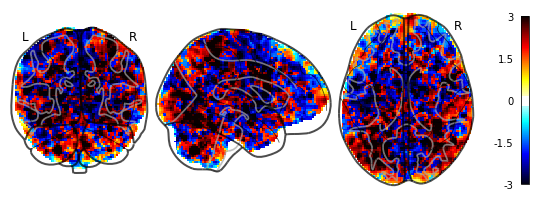

09/22/2021 05:24:51 Reconstruction Error (Frobenius Norm): 5.82310730e+02 out of 4.99639709e+02


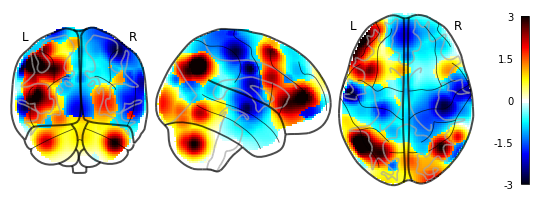

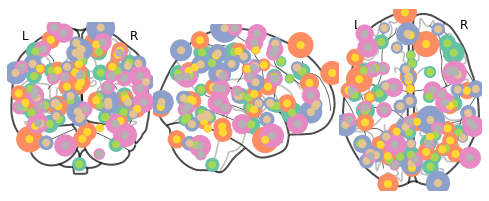

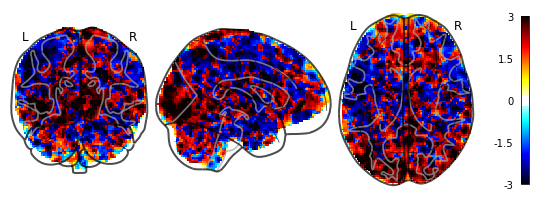

09/22/2021 05:25:10 Reconstruction Error (Frobenius Norm): 5.93157166e+02 out of 5.09556702e+02


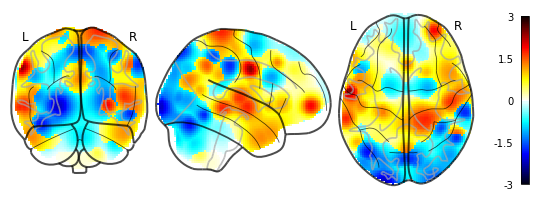

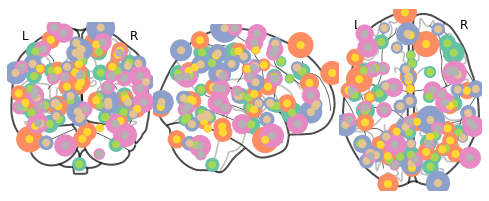

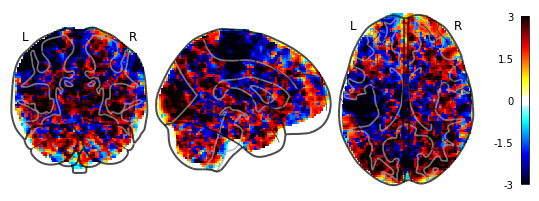

09/22/2021 05:25:30 Reconstruction Error (Frobenius Norm): 6.06979797e+02 out of 5.17583130e+02


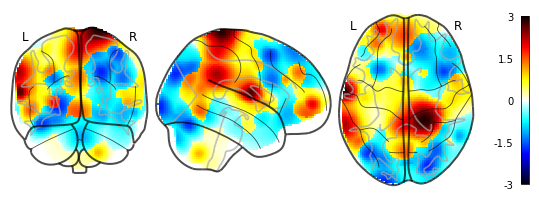

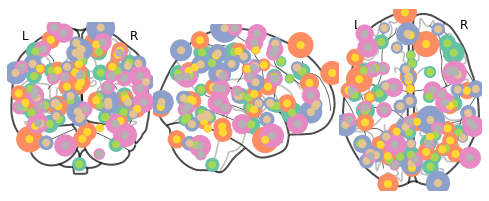

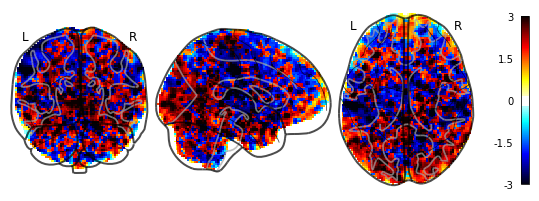

09/22/2021 05:25:51 Reconstruction Error (Frobenius Norm): 5.54909363e+02 out of 4.92101685e+02


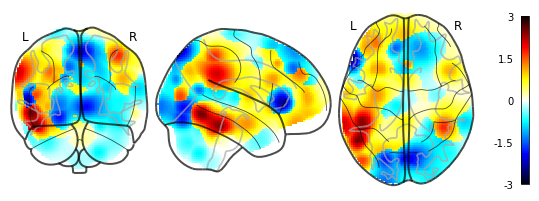

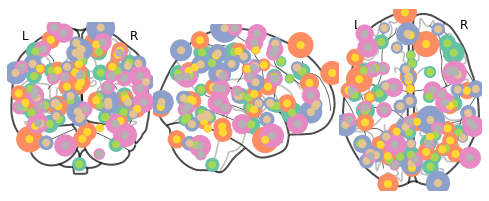

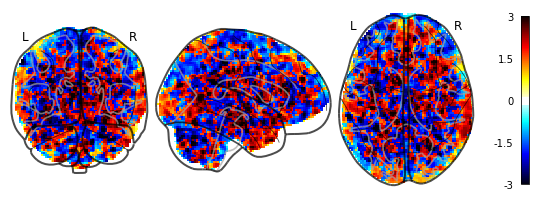

09/22/2021 05:26:14 Reconstruction Error (Frobenius Norm): 4.79278809e+02 out of 4.08802826e+02


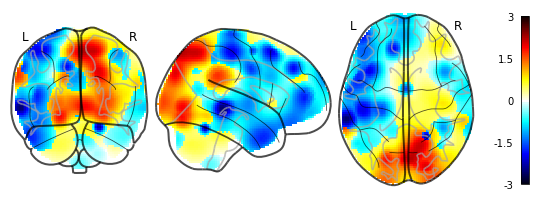

In [17]:
subject_runs = affvids_db.subject_runs()

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in affvids_db.blocks.values() if block['subject'] == subject and block['run'] == run]
    blocks.sort(key=lambda b: b['times'][0])
    for block in blocks:
        index = block['id']
        dtfa.plot_factor_centers(index, labeler=block_task_labeler)
        dtfa.plot_original_brain(index, labeler=block_task_labeler)
        dtfa.plot_reconstruction(index, labeler=block_task_labeler)

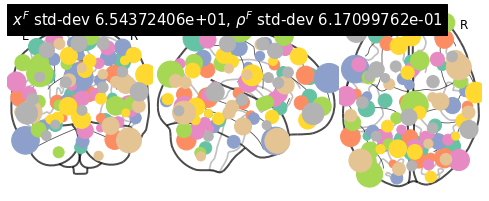

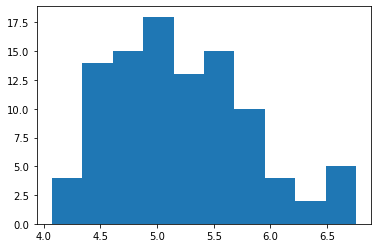

(<nilearn.plotting.displays.OrthoProjector at 0x7ff38073bc10>,
 tensor([[-45.7084, -25.1504,  61.9104],
         [-26.1982, -16.8889, -19.9934],
         [ 26.4014, -42.9818, -15.2692],
         [  1.0117,  24.3884,  34.9779],
         [ -9.3967, -57.1154,  11.7838],
         [  0.9718,  51.9806,  10.0725],
         [  5.6469, -67.4839,  71.4004],
         [  0.7233, -57.3258, -43.9742],
         [-45.2036, -54.1907,  -7.8130],
         [-35.2357,  52.5275,  31.4193],
         [ 48.1978,  21.0292,  -1.7926],
         [ 33.9019,  19.9308,   7.9221],
         [ 44.1072, -64.7188,  46.3201],
         [-56.3068,  -9.6614,  -9.9258],
         [-17.9357, -83.3974, -13.0333],
         [ 21.8674, -76.9180, -13.1955],
         [  9.3580, -79.7309,  12.2516],
         [ 36.1335,  47.7758,  32.5620],
         [-62.6624, -54.8042,   8.9379],
         [ 60.5013, -22.8702,  13.5597],
         [ -3.8413, -18.2911,   4.0993],
         [-47.8407,  15.1986,  43.5966],
         [  0.1777, -55.5535,  38.0

In [18]:
dtfa.visualize_factor_embedding()

In [19]:
dtfa.average_reconstruction_error()

09/22/2021 07:25:00 Average reconstruction error (MSE): 1.16012075e+00
09/22/2021 07:25:00 Average data norm (Euclidean): 1.07330516e+00
09/22/2021 07:25:00 Percent average reconstruction error: 0.234366


(1.1601207452541562, 1.0733051636025548, 0.0023436603895298034)

In [20]:
dtfa.average_reconstruction_error(weighted=False)

09/22/2021 09:22:13 Average reconstruction error (MSE): 2.72109304e+03 +/- 1.21080397e+02
09/22/2021 09:22:13 Average data norm (Euclidean): 2.51696821e+03 +/- 1.22813805e+02
09/22/2021 09:22:13 Percent average reconstruction error: 108.226340 +/- 4.59663635e+00


(array([3050.54443359, 2833.70947266, 2922.41821289, ..., 2605.86694336,
        2631.94799805, 2781.60058594]),
 array([2807.91381836, 2835.75683594, 2835.75683594, ..., 2379.30639648,
        2335.45068359, 2379.30639648]),
 array([1.08640957, 0.99927802, 1.03056023, ..., 1.09522126, 1.12695507,
        1.16908045]))

In [21]:
def subject_task_blocks(subject_label, task_label, subject_labeler=subject_labeler, task_labeler=task_labeler):
    for b in dtfa._blocks:
        if subject_labeler(b.subject) == subject_label and task_labeler(b.task) == task_label:
            yield b

In [22]:
def subject_blocks(subject_label, subject_labeler=subject_labeler):
    for b in dtfa._blocks:
        if subject_labeler(b.subject) == subject_label:
            yield b

In [23]:
def subject_fear_ratings(subject_label, subject_labeler=subject_labeler):
    for b in subject_blocks(subject_label, subject_labeler):
        if b.individual_differences['fear_rating']:
            yield b.individual_differences['fear_rating']

In [24]:
def subject_task_fear_ratings(subject_label, task_label, subject_labeler=subject_labeler, task_labeler=task_labeler):
    for b in subject_task_blocks(subject_label, task_label, subject_labeler, task_labeler):
        if b.individual_differences['fear_rating']:
            yield b.individual_differences['fear_rating']

In [25]:
def fear_labeler(subject, task, task_labeler=task_labeler, threshold=0.5):
    subject_ratings = [rating for rating in subject_task_fear_ratings(subject, task, lambda s: s)]
    if threshold:
        if np.mean(subject_ratings) >= threshold:
            return 'Afraid of %s' % task
        return 'Unafraid of %s' % task
    result = np.mean(subject_ratings)
    return result if not np.isnan(result) else 0.0

In [26]:
def subject_fear_labeler(subject, threshold=0.5):
    subject_ratings = [rating for rating in subject_fear_ratings(subject, lambda s: s)]
    if threshold:
        if np.mean(subject_ratings) >= threshold:
            return 'Fearful'
        return 'Not fearful'
    result = np.nanmean(subject_ratings)
    return result if not np.isnan(result) else 0.0

In [27]:
def subject_average_fear_labeler(subject):
    return subject_fear_labeler(subject, threshold=None)

In [28]:
def heights_fear_labeler(subject):
    return fear_labeler(subject, 'Heights', threshold=None)

In [29]:
def spiders_fear_labeler(subject):
    return fear_labeler(subject, 'Spiders', threshold=None)

In [30]:
def social_threat_fear_labeler(subject):
    return fear_labeler(subject, 'Social threat', threshold=None)